In [163]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix
import string
import wordcloud

In [137]:
data = pd.read_csv("spam.csv", encoding = "latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [138]:
data = data[['v1', 'v2']]
data = data.rename(columns = {'v1': 'label', 'v2': 'text'})

In [157]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

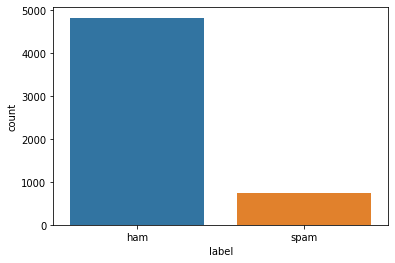

In [160]:
#Distribution of Ham and Spam Messages
sns.countplot(x='label',data=data)

In [178]:
#Wordcloud of stopwords present in Ham and Spam messages
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7))
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

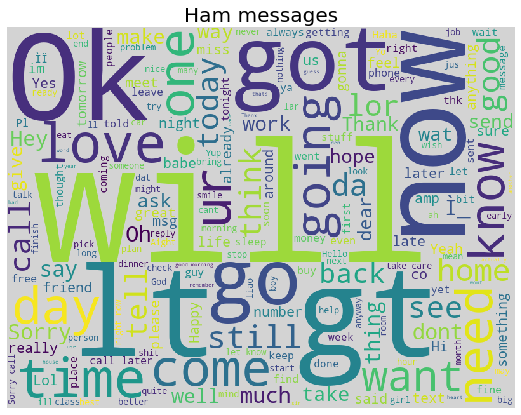

In [179]:
show_wordcloud(data[data['label']=='ham'], "Ham messages")

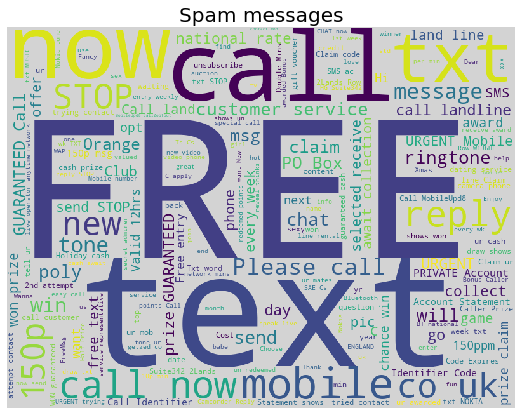

In [180]:
show_wordcloud(data[data['label']=='spam'], "Spam messages")

##### Text Cleaning

In [139]:
#Remove the default punctuations
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [140]:
def remove_punctuation(text):
    punctuation_text=''.join([char for char in text if char not in string.punctuation])
    return punctuation_text

In [141]:
data['punctuation_text']=data['text'].apply(lambda row : remove_punctuation(row))
data.head()

,label,text,punctuation_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [142]:
#Tokenizing the text
data['tokenized_text']=data['punctuation_text'].apply(lambda row : word_tokenize(row.lower()))
data.head()

,label,text,punctuation_text,tokenized_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [143]:
#Removing the default stop words present in the NLTK library
stopwords = set(stopwords.words('english'))
def remove_stopwords(text):
    clean_text=[word for word in text if word not in stopwords]
    return clean_text 

In [144]:
data['stopwords_text']=data['tokenized_text'].apply(lambda row : remove_stopwords(row))
data.head()

,label,text,punctuation_text,tokenized_text,stopwords_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [145]:
#Lemmatizing the text for getting the root word.
#Stemming can also be done but occasionally stemming converts all the tokens to a root word which has no dictionary meaning.

In [146]:
lemmatizer = WordNetLemmatizer()
def stemming(tokenized_text):
    stemmed_text=[lemmatizer.lemmatize(word) for word in tokenized_text]
    return stemmed_text

In [147]:
data['Lemmatized_text']=data.stopwords_text.apply(lambda row : stemming(row))
data[['text','Lemmatized_text']].head()

,text,Lemmatized_text
0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]"


In [148]:
def get_cleaned_text(Lemmatized_text):
    Cleaned_text=" ".join([word for word in Lemmatized_text])
    return Cleaned_text

In [149]:
data['Cleaned_text']=data.Lemmatized_text.apply(lambda row : get_cleaned_text(row))
data.head()

,label,text,punctuation_text,tokenized_text,stopwords_text,Lemmatized_text,Cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though


In [151]:
print(data['text'][0])
print(data['Cleaned_text'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
go jurong point crazy available bugis n great world la e buffet cine got amore wat


In [153]:
# Dependent - Independent Split
X = data['Cleaned_text']
y = data['label']

In [154]:
Vectorizer=TfidfVectorizer()
X=Vectorizer.fit_transform(X)
len(Vectorizer.get_feature_names())

8841

In [155]:
pd.DataFrame(X.toarray(),columns=Vectorizer.get_feature_names()).head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,ìï,ìïll,ûthanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection

In [107]:
models = []
models.append(('LR1', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('BCL', BaggingClassifier()))
models.append(('SVC', SVC()))
models.append(('NB', MultinomialNB()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits = 5)
    cv_results = model_selection.cross_val_score(model,X,y, cv = kfold, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR1: 0.985696 (0.006682)
KNN: 0.813853 (0.044164)
DTC: 0.894505 (0.020138)
RFC: 0.986673 (0.006401)
ADA: 0.962080 (0.009039)
GBC: 0.960028 (0.009137)
BCL: 0.955848 (0.004764)
SVC: 0.989682 (0.005174)
NB: 0.983209 (0.006299)


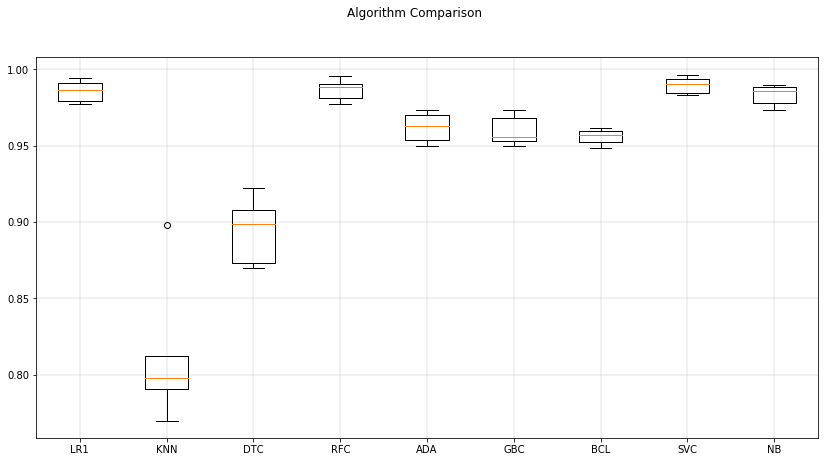

In [108]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(14,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid(linewidth=2, alpha=0.3, color='lightgrey')
plt.show()

###### Final Verdict - Fine tuned Support Vector Classifier is going to be the goto algorithm for Spam Classification